# 앙상블 (Ensenble) : Bagging (Bootstrap Aggregation)
- 다양한 모델을 결합하여 예측 성능을 향상시키는 방법
    - Bootstrap 방식의 샘플링 : 각 estimator 마다 훈련 데이터를 뽑을 때, 중복 값을 허용하는 방식
    - 분류 모델의 경우, 각 tree(estimator)의 예측값을 다수결(hard voting) 결정
    - 회귀 모델의 경우, 각 tree(estimator)의 예측값을 평균내어 결정
    - 기본적으로 100개의 tree 사용 

**하이퍼 파라미터**
| **하이퍼파라미터**      | **설명**                                                                                     | **기본값**      |
|--------------------------|--------------------------------------------------------------------------------------------|-----------------|
| `n_estimators`           | 생성할 트리의 개수 지정 (트리의 개수가 많을수록 성능이 좋아질 수 있지만 계산 비용 증가) | 100             |
| `criterion`              | 분할 품질을 측정하는 기준 (분류에서는 \"gini\" 또는 \"entropy\"를 사용)                 | \"gini\"          |
| `max_depth`              | 각 트리의 최대 깊이 (설정하지 않으면 트리는 잎 노드가 순수해질 때까지 계속 확장) | None            |
| `min_samples_split`      | 내부 노드를 분할하기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                   | 2               |
| `min_samples_leaf`       | 잎 노드가 되기 위해 필요한 최소 샘플 수 (과적합 방지 목적)                          | 1               |
| `max_features`           | 각 트리를 분할할 때 고려할 최대 특성 수 ()\"auto\", \"sqrt\", \"log2\" 중 선택하거나, 특정 숫자 지정 가능) | "auto\"          |
| `bootstrap`              | 각 트리를 만들 때 부트스트랩 샘플링을 사용할지 여부를 결정                               | True            |
| `random_state`           | 결과의 재현성을 위해 난수 시드 고정                                                  | None            |
| `n_jobs`                 | 병렬 계산을 위해 사용할 CPU 코어 수를 지정 (-1로 설정하면 모든 코어를 사용)           | None            |
| `class_weight`           | 각 클래스의 가중치를 자동으로 계산하거나 직접 지정 가능 (불균형 데이터 처리에 유용)    | None          

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
# data.DESCR  # 설명

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
from sklearn.model_selection import train_test_split

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=101, 
    max_depth=7, 
    random_state=0
)

rf_clf.fit(X_train, y_train)
print(f'학습 점수 : { rf_clf.score(X_train, y_train)}')
print(f'데스트 점수 : { rf_clf.score(X_test, y_test)}')

학습 점수 : 0.9976525821596244
데스트 점수 : 0.9790209790209791


In [ ]:
# 101개의 DecisionTree 확인
# print(rf_clf.estimators_)

# 101개의 Decisiontree가 사용한 샘플데이터 확인
# print(rf_clf.estimators_samples_)

for i, sample_idex in enumerate(rf_clf.estimators_samples_) :
    print(f'{i}번째 DecisionTree의 샘플 인덱스 : {sorted(sample_idex)}')    # 샘플 인덱스에 중복 값이 들어있음 (복원 추출 방식)

0번째 DecisionTree의 샘플 인덱스 : [np.int32(0), np.int32(0), np.int32(1), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(12), np.int32(12), np.int32(13), np.int32(16), np.int32(16), np.int32(16), np.int32(20), np.int32(22), np.int32(22), np.int32(24), np.int32(25), np.int32(25), np.int32(26), np.int32(31), np.int32(32), np.int32(32), np.int32(32), np.int32(35), np.int32(36), np.int32(36), np.int32(36), np.int32(38), np.int32(38), np.int32(40), np.int32(41), np.int32(41), np.int32(44), np.int32(45), np.int32(49), np.int32(49), np.int32(49), np.int32(53), np.int32(53), np.int32(55), np.int32(56), np.int32(56), np.int32(56), np.int32(57), np.int32(57), np.int32(57), np.int32(57), np.int32(59), np.int32(59), np.int32(60), np.int32(60), np.int32(62), np.int32(63), np.int32(63), np.int32(64), np.int32(65), np.int32(65), np.int32(66), np.int32(66), np.int32(66), np.int32(71), np.int32(72), np.int32(73), np.int32(75), np.int32(76), np.int32(77), np

In [10]:
feat_imptc_ser = pd.Series(rf_clf.feature_importances_, index=data.feature_names).sort_values(ascending=False)
feat_imptc_ser

worst perimeter            0.162959
worst radius               0.116312
worst concave points       0.113276
mean concave points        0.109122
worst area                 0.061360
mean concavity             0.055477
mean perimeter             0.053938
mean area                  0.048122
worst concavity            0.037659
area error                 0.033015
radius error               0.029128
mean radius                0.024138
mean texture               0.015852
worst texture              0.014613
perimeter error            0.014427
worst smoothness           0.013655
worst compactness          0.012321
worst symmetry             0.012223
worst fractal dimension    0.009629
mean compactness           0.008857
mean smoothness            0.007069
texture error              0.006663
concave points error       0.006617
mean symmetry              0.006303
concavity error            0.006120
symmetry error             0.004555
fractal dimension error    0.004544
compactness error          0

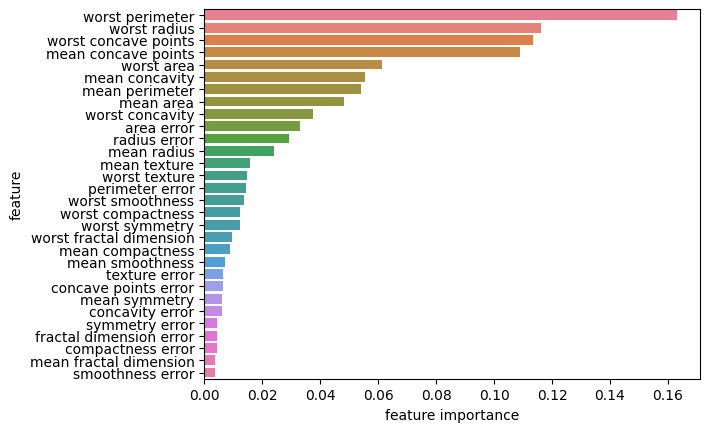

In [11]:
plt.Figure(figsize=(8, 6))
sns.barplot(
    x = feat_imptc_ser, 
    y = feat_imptc_ser.index, 
    hue = feat_imptc_ser.index
)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()